In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Описание: ###
На вкладке data приведены сессии просмотра телеканалов респондентами

**1. Задание (анализ данных):**  
Загрузить датасет в pandas dataframe и при необходимости предобработать
После всестороннего анализа данных описать выявленные особенности телепотребления

**2. Задание (обработка данных):**  
Необходимо построить почасовую динамику в течение дня. 
Обращаем внимание, что сессию  15:45-17:08 логичино учитывать в трех часовых интервалах - 15:00-16:00, 16:00-17:00, 17:00-18:00

**3. Задание (Tableau):**  
Сделать дашборд с ключевыми выводами

Ожидаемый результат:
На выходе мы бы хотели получить 
- jupyter notebook с написанным кодом и текстовыми выводами с интерпретацией полученных результов
- ссылку на дашборд в Tableau

### **1. Задание (анализ данных):**  ###

In [4]:
data = pd.read_excel(
    "MediaScope – дата аналитик - Тестовое xn--80aalfgj8a.xlsx", sheet_name="data"
)
data

,ResearchDate,RespondentID,Start,Stop,Duration,PackageID,Weight,Title
0,2021-02-06,resp0478878,2021-02-06 20:20:00,2021-02-06 20:20:00,60,2004,6.590,Мужчины 45-54
1,2021-02-06,resp0478878,2021-02-06 15:45:00,2021-02-06 17:08:00,5040,2039,6.590,Мужчины 45-54
2,2021-02-06,resp0478878,2021-02-06 10:07:00,2021-02-06 11:57:00,6660,2075,6.590,Мужчины 45-54
3,2021-02-06,resp0478878,2021-02-06 21:05:00,2021-02-06 21:06:00,120,2075,6.590,Мужчины 45-54
4,2021-02-06,resp0478878,2021-02-06 18:09:00,2021-02-06 18:38:00,1800,2086,6.590,Мужчины 45-54
...,...,...,...,...,...,...,...,...
150292,2021-02-14,resp8404155,2021-02-14 14:34:00,2021-02-14 14:36:00,180,2105,8.812,Мужчины 18-24
150293,2021-02-14,resp8404155,2021-02-14 14:38:00,2021-02-14 14:40:00,180,2105,8.812,Мужчины 18-24
150294,2021-02-14,resp8404155,2021-02-14 14:42:00,2021-02-14 14:42:00,60,2105,8.812,Мужчины 18-24
150295,2021-02-14,resp8404155,2021-02-14 14:45:00,2021-02-14 14:47:00,180,2105,8.812,Мужчины 18-24


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150297 entries, 0 to 150296
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ResearchDate  150297 non-null  datetime64[ns]
 1   RespondentID  150297 non-null  object        
 2   Start         150297 non-null  datetime64[ns]
 3   Stop          150297 non-null  datetime64[ns]
 4   Duration      150297 non-null  int64         
 5   PackageID     150297 non-null  int64         
 6   Weight        150297 non-null  float64       
 7   Title         150297 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(2)
memory usage: 9.2+ MB


In [15]:
data.duplicated().sum()

1716

In [16]:
data[data.duplicated(keep=False)]

,ResearchDate,RespondentID,Start,Stop,Duration,PackageID,Weight,Title
155,2021-02-06,resp1739579,2021-02-07 01:54:00,2021-02-07 01:54:00,60,2094,2.231,Мужчины 55-64
156,2021-02-06,resp1739579,2021-02-07 01:54:00,2021-02-07 01:54:00,60,2094,2.231,Мужчины 55-64
296,2021-02-06,resp3713424,2021-02-06 16:53:00,2021-02-06 17:01:00,540,2094,1.508,Мужчины 55-64
297,2021-02-06,resp3713424,2021-02-06 16:53:00,2021-02-06 17:01:00,540,2094,1.508,Мужчины 55-64
298,2021-02-06,resp3713424,2021-02-06 17:12:00,2021-02-06 17:16:00,300,2094,1.508,Мужчины 55-64
...,...,...,...,...,...,...,...,...
149801,2021-02-14,resp3765236,2021-02-14 23:50:00,2021-02-15 03:34:00,13500,2094,1.634,Мужчины 45-54
149802,2021-02-14,resp3765236,2021-02-15 03:37:00,2021-02-15 04:36:00,3600,2094,1.634,Мужчины 45-54
149803,2021-02-14,resp3765236,2021-02-15 03:37:00,2021-02-15 04:36:00,3600,2094,1.634,Мужчины 45-54
150267,2021-02-14,resp7737219,2021-02-14 17:29:00,2021-02-14 17:29:00,60,2094,6.294,Женщины 25-34


In [17]:
data = data.drop_duplicates()

In [21]:
data.Duration.value_counts(dropna=False).sort_index()

Duration
60       32019
120      19470
180      12333
240       8519
300       6734
         ...  
39240        1
39480        1
44040        1
45540        1
50640        1
Name: count, Length: 426, dtype: int64

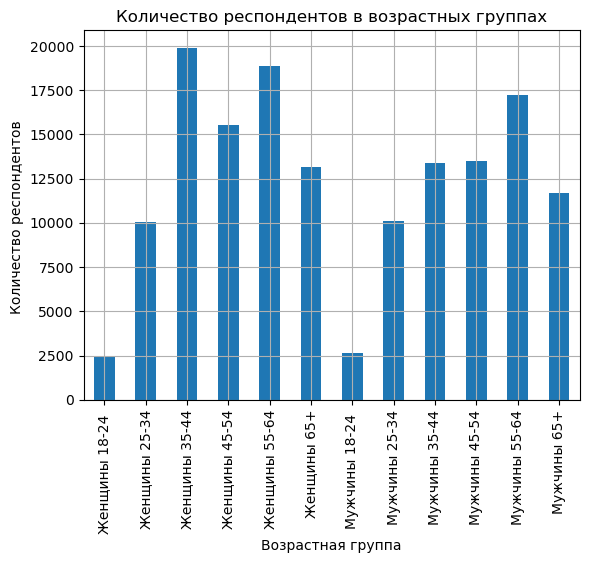

In [30]:
# Построение столбчатой диаграммы
data["Title"].value_counts().sort_index().plot(kind="bar")

plt.title("Количество респондентов в возрастных группах")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество респондентов ")
plt.grid()


plt.show()

In [ ]:
# Создадим функцию для определения временного интервала
def time_interval(hour):
    if 6 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 18:
        return 'День'
    elif 18 <= hour < 24:
        return 'Вечер'
    else:
        return 'Ночь'

# Применим функцию к столбцу 'Start' для определения временного интервала начала сессии просмотра
data['TimeOfDay'] = data['Start'].apply(lambda x: time_interval(x.hour))

In [34]:
# сгруппируем данные по временному интервалу и посчитаем количество сессий просмотра в каждом интервале
time_of_day_counts = data.groupby("TimeOfDay").size()

# посмотрим на количество сессий просмотра по времени суток и возрастным группам
time_of_day_age_group_counts = data.groupby(["TimeOfDay", "Title"]).size().unstack()

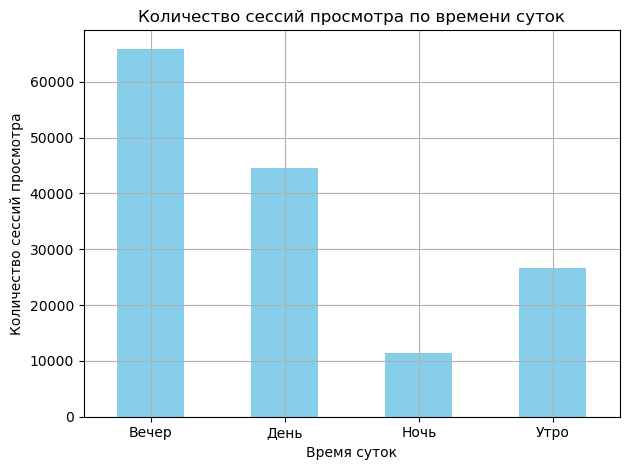

In [37]:
time_of_day_counts.plot(kind="bar", color="skyblue")

plt.title("Количество сессий просмотра по времени суток")
plt.xlabel("Время суток")
plt.ylabel("Количество сессий просмотра")
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()

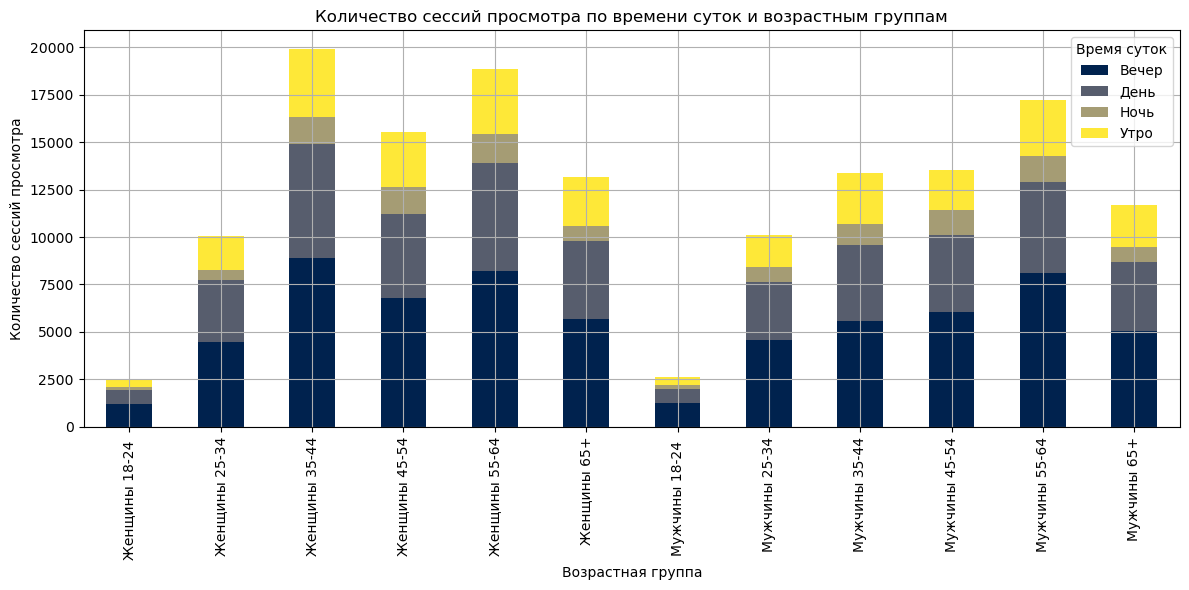

In [53]:
time_of_day_age_group_counts.T.plot(kind="bar", stacked=True, figsize=(12,6), cmap="cividis")

plt.title("Количество сессий просмотра по времени суток и возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество сессий просмотра")
plt.xticks(rotation=90)
plt.legend(title="Время суток")
plt.grid()
plt.tight_layout()
plt.show()

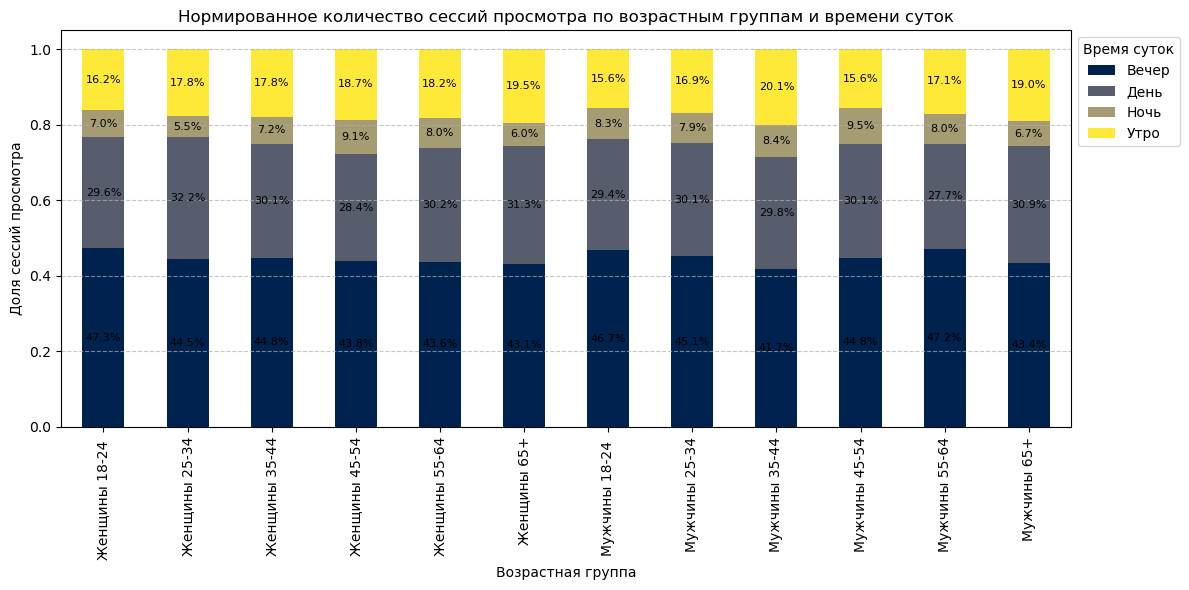

In [72]:
# Транспонирование DataFrame перед нормализацией
time_of_day_age_group_counts_transposed = time_of_day_age_group_counts.transpose()

# Нормализация данных
normalized_counts = time_of_day_age_group_counts_transposed.div(
    time_of_day_age_group_counts_transposed.sum(axis=1), axis=0
)

# Визуализация нормированных данных
ax = normalized_counts.plot(kind="bar", stacked=True, cmap="cividis", figsize=(12, 6))

# Добавление значений процентов на бары
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)

plt.title(
    "Нормированное количество сессий просмотра по возрастным группам и времени суток"
)
plt.xlabel("Возрастная группа")
plt.ylabel("Доля сессий просмотра")
plt.xticks(rotation=90)
plt.legend(title="Время суток", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()